In [1]:
# import major math & visual libraries needed for the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [2]:
# import all potential Machine Learning libraries needed for the project
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from xgboost import XGBClassifier

In [3]:
# Take sample of data
csv_path = Path("loantape_raw.csv")
csv_data = pd.read_csv(csv_path, index_col="ID")
csv_data.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,rem_term
ID,,,,,,,,,,,,,
12771,23,85000,MORTGAGE,6.0,EDUCATION,B,10000,10.99,0,0.12,N,2,60
10229,22,60000,MORTGAGE,NaN,EDUCATION,A,14000,7.49,1,0.23,N,2,60
7258,24,52000,MORTGAGE,0.0,EDUCATION,C,1200,13.98,0,0.02,Y,2,36
8658,26,30000,RENT,1.0,MEDICAL,B,8000,10.00,0,0.27,N,3,60
7874,24,55000,MORTGAGE,8.0,VENTURE,A,1800,7.49,0,0.03,N,4,36


In [4]:
# Identify Datatypes in DataFrame 
csv_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
rem_term                        int64
dtype: object

In [5]:
# Assess data quality by identifying the number of rows
csv_data.count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 32581
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
rem_term                      32581
dtype: int64

In [6]:
# Determining percentage of nulls
csv_data.isnull().mean() * 100

person_age                    0.000
person_income                 0.000
person_home_ownership         0.000
person_emp_length             2.747
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 0.000
loan_status                   0.000
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
rem_term                      0.000
dtype: float64

In [7]:
# dropnas
loandata_clean=csv_data.dropna()
loandata_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,rem_term
ID,,,,,,,,,,,,,
1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,60
2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,60
3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,36
4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,36
5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,60


In [8]:
# Determining percentage of nulls, again
loandata_clean.isnull().mean() * 100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
rem_term                      0.0
dtype: float64

In [9]:
loandata_clean.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
rem_term                        int64
dtype: object

In [10]:
# separate numeric & non-numeric columns
cred_num = loandata_clean.select_dtypes(exclude=['object'])
cred_nonnum = loandata_clean.select_dtypes(include=['object'])

In [11]:
# create dummy variables for non-numeric dtypes
cred_nonnum_dum = pd.get_dummies(cred_nonnum)

In [12]:
#concat dataframes
loan_data = pd.concat([cred_num,cred_nonnum_dum],axis=1)
loan_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,rem_term,person_home_ownership_MORTGAGE,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
ID,,,,,,,,,,,,,,,,,,,,,
1,22,59000,123.0,35000,16.02,1,0.59,3,60,0,...,0,0,0,0,1,0,0,0,0,1
2,21,9600,5.0,1000,11.14,0,0.10,2,60,0,...,0,0,1,0,0,0,0,0,1,0
3,25,9600,1.0,5500,12.87,1,0.57,3,36,1,...,0,0,0,1,0,0,0,0,1,0
4,23,65500,4.0,35000,15.23,1,0.53,2,36,0,...,0,0,0,1,0,0,0,0,1,0
5,24,54400,8.0,35000,14.27,1,0.55,4,60,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
# Prepare data for ML process
# Split the Data into Training and Testing
# Create our features
X = loan_data.drop(columns="loan_status")

# Create our target
y = loan_data["loan_status"]

In [14]:
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,rem_term,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,...,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.074397,0.169612,5.809316,43.905321,0.413211,0.003377,...,0.175346,0.327305,0.321467,0.199489,0.112226,0.030045,0.007448,0.002020,0.822351,0.177649
std,6.360283,6.242729e+04,4.142630,6336.226458,3.232059,0.106297,4.060867,11.279965,0.492418,0.058014,...,0.380268,0.469237,0.467047,0.399622,0.315650,0.170713,0.085982,0.044898,0.382223,0.382223
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,36.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,36.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,11.030000,0.150000,4.000000,36.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000,60.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,60.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Check the balance of our target values
loan_data['loan_status'].value_counts()

0    24860
1     6826
Name: loan_status, dtype: int64

In [16]:
# Split the X and y into X_train, X_test, y_train, y_test
# 60% training dataset; 40% test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, test_size=.4, 
                                                   random_state=123, 
                                                   stratify=y)
X_train.shape

(19011, 27)

In [17]:
# setup Logistic regression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Train the data with the training dataset
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Print the coefficients derived from the training data set
print(classifier.coef_)

[[-4.05599820e-02 -3.61818215e-05 -3.76825275e-02  9.93459457e-05
   1.89899366e-01  2.42709897e-03  2.96510405e-02 -2.90145693e-02
  -1.94082363e-02  4.99775460e-05 -1.26911793e-02  2.63718766e-02
   1.04633674e-02 -1.10314057e-02  6.86842181e-03  5.27350200e-03
  -5.36154105e-03 -1.18899059e-02 -2.23746625e-02 -2.12023817e-02
  -8.83834384e-03  3.25291745e-02  9.91591655e-03  3.01040922e-03
   1.28232621e-03 -2.51875712e-02  1.95100097e-02]]


In [20]:
# Create predictions of probability for loan status using test data
pred = classifier.predict_proba(X_test)
pred

array([[0.87871062, 0.12128938],
       [0.76394009, 0.23605991],
       [0.80762742, 0.19237258],
       ...,
       [0.93362907, 0.06637093],
       [0.83622687, 0.16377313],
       [0.82640411, 0.17359589]])

In [21]:
# Create dataframes of predictions, and true labels
pred_df = pd.DataFrame(pred[:,1], columns = ['prob_default'])
true_df = y_test
true_df

ID
6004     0
31625    1
19839    0
2749     1
8605     0
        ..
31809    0
28605    0
28691    0
2037     0
31729    1
Name: loan_status, Length: 12675, dtype: int64

In [22]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), pred_df], axis = 1))

       loan_status  prob_default
0                0      0.121289
1                1      0.236060
2                0      0.192373
3                1      0.410643
4                0      0.566930
...            ...           ...
12670            0      0.003404
12671            0      0.072479
12672            0      0.066371
12673            0      0.163773
12674            1      0.173596

[12675 rows x 2 columns]


In [23]:
new = pd.concat([true_df.reset_index(drop = True), pred_df], axis = 1)
new.tail()

,loan_status,prob_default
12670,0,0.003404
12671,0,0.072479
12672,0,0.066371
12673,0,0.163773
12674,1,0.173596


In [24]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [25]:
# Create a dataframe for the probabilities of default
pred_df = pd.DataFrame(pred[:,1], columns = ['prob_default'])
pred_df.tail()

,prob_default
12670,0.003404
12671,0.072479
12672,0.066371
12673,0.163773
12674,0.173596


In [26]:
# Reassign loan status based on the threshold
pred_df['loan_status'] = pred_df['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)
pred_df.tail()

,prob_default,loan_status
12670,0.003404,0
12671,0.072479,0
12672,0.066371,0
12673,0.163773,0
12674,0.173596,0


In [27]:
# Print the row counts for each loan status
print(pred_df['loan_status'].value_counts())

0    10327
1     2348
Name: loan_status, dtype: int64


In [58]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.87      0.90      0.88      9944
     Default       0.57      0.49      0.53      2731

    accuracy                           0.81     12675
   macro avg       0.72      0.70      0.71     12675
weighted avg       0.80      0.81      0.81     12675



In [59]:
pred_df.count()

prob_default    12675
loan_status     12675
dtype: int64

In [60]:
# Print the confusion matrix
print(confusion_matrix(y_test,pred_df['loan_status']))

[[8939 1005]
 [1388 1343]]


In [61]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,pred_df['loan_status']))

(array([0.86559504, 0.57197615]), array([0.89893403, 0.49176126]), array([0.88194958, 0.52884426]), array([9944, 2731], dtype=int64))


In [62]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,pred_df['loan_status'])[0])

[0.86559504 0.57197615]


0.8219329388560158


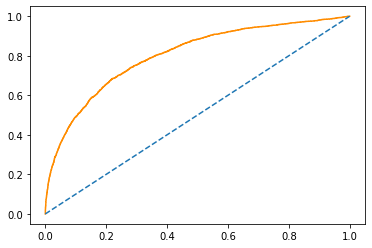

In [63]:
# Create predictions of probability for loan status using test data
pred = classifier.predict_proba(X_test)

# Print the accuracy score the model
print(classifier.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = pred[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
#auc = roc_auc_score(y_test, prob_default)

In [34]:
prob_default = pred[:, 1]
prob_default

array([0.12128938, 0.23605991, 0.19237258, ..., 0.06637093, 0.16377313,
       0.17359589])

In [36]:
# start using XGBoost
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of predictions, and true labels
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

       loan_status  prob_default
0                0      0.065829
1                1      0.965480
2                0      0.117427
3                1      0.820973
4                0      0.211945
...            ...           ...
12670            0      0.017798
12671            0      0.099882
12672            0      0.054771
12673            0      0.110865
12674            1      0.181134

[12675 rows x 2 columns]


In [37]:
prob_default2 = gbt_preds[:, 1]
prob_default2

array([0.06582889, 0.96548027, 0.11742743, ..., 0.05477149, 0.11086532,
       0.18113363], dtype=float32)

In [38]:
preds_df.tail()

,prob_default
12670,0.017798
12671,0.099882
12672,0.054771
12673,0.110865
12674,0.181134


In [39]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.96      9944
     Default       0.96      0.70      0.81      2731

    accuracy                           0.93     12675
   macro avg       0.94      0.85      0.88     12675
weighted avg       0.93      0.93      0.92     12675



In [42]:
# higher recall for dedault indicates better results for XGBoost compared to logistic regression

In [64]:
# assess feature importance
# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 81, 'loan_grade_D': 44, 'person_income': 116, 'loan_intent_DEBTCONSOLIDATION': 33, 'person_home_ownership_RENT': 46, 'loan_int_rate': 46, 'person_emp_length': 30, 'loan_grade_E': 37, 'loan_grade_C': 4, 'loan_intent_MEDICAL': 28, 'loan_intent_HOMEIMPROVEMENT': 25, 'person_home_ownership_OWN': 36, 'loan_grade_A': 13, 'loan_grade_B': 7, 'loan_intent_VENTURE': 17, 'loan_grade_F': 17, 'loan_grade_G': 20, 'person_home_ownership_MORTGAGE': 6, 'loan_intent_EDUCATION': 6, 'person_age': 5, 'loan_intent_PERSONAL': 6, 'loan_amnt': 9, 'cb_person_cred_hist_length': 2}


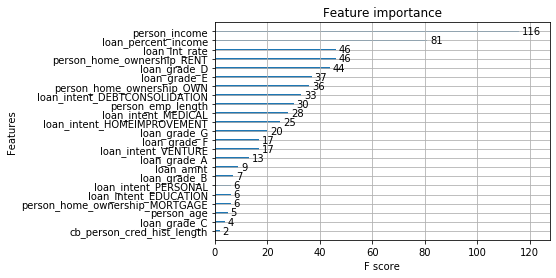

In [65]:
# Plot the column importance for this model
xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

In [66]:
# evaluating both models
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, pred_df['loan_status'], target_names=target_names))
# Print the gradient boosted tree classification report
print(classification_report(y_test, gbt_preds, target_names=target_names))



              precision    recall  f1-score   support

 Non-Default       0.87      0.90      0.88      9944
     Default       0.57      0.49      0.53      2731

    accuracy                           0.81     12675
   macro avg       0.72      0.70      0.71     12675
weighted avg       0.80      0.81      0.81     12675

              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.96      9944
     Default       0.96      0.70      0.81      2731

    accuracy                           0.93     12675
   macro avg       0.94      0.85      0.88     12675
weighted avg       0.93      0.93      0.92     12675



In [67]:
# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,pred_df['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,gbt_preds, average = 'macro')[2])

0.7053969219147882
0.8831847877767947


In [68]:
# gradient booster appears to be more accurate

In [69]:
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, prob_default))

Logistic Regression AUC Score: 0.80


In [70]:
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, prob_default2))

Gradient Boosted Tree AUC Score: 0.93


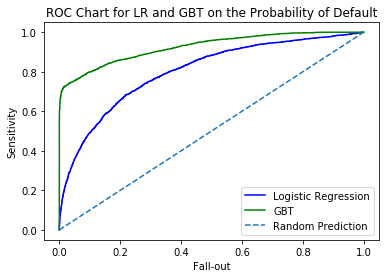

In [72]:
# ROC Chart with both
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
fallout2, sensitivity2, thresholds2 = roc_curve(y_test, prob_default2)
plt.plot(fallout, sensitivity, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout2, sensitivity2, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()